In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


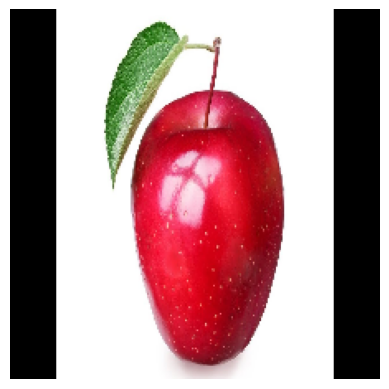

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1. apple: 0.99
2. tomato: 0.01
3. capsicum: 0.00
The top predicted class is: apple with a probability of 0.99


In [12]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load custom-trained model
model = tf.keras.models.load_model('./custom_mobilenet_model.h5', compile=False)

# Define the custom class labels
class_labels = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot',
    'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger',
    'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange',
    'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish',
    'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon'
]

# Function to load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

# Function to predict the class of the image
def classify_image(img_path):
    img_array = preprocess_image(img_path)

    # Make predictions using the model
    predictions = model.predict(img_array)
    predictions = predictions[0]  # Shape: (num_classes,)

    # Get top 3 predictions
    top_indices = predictions.argsort()[-3:][::-1]
    top_predictions = [(class_labels[i], predictions[i]) for i in top_indices]

    # Print top 3 predictions
    for i, (label, score) in enumerate(top_predictions):
        print(f"{i+1}. {label}: {score:.2f}")

    return top_predictions[0]

# Example image path (update this to match your folder structure)
img_path = './images/apple.jpg'

# Display the image (unprocessed)
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

# Classify the image
top_prediction = classify_image(img_path)

# Output the top predicted class
print(f"The top predicted class is: {top_prediction[0]} with a probability of {top_prediction[1]:.2f}")
